<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 2
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Aban 27th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [25]:
# Set your student number
student_number = 98101822
Name = 'یلدا'
Last_Name = 'شعبان زاده'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Aban 27th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 7th 23:59:59.

In [26]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30 Points + 5 Extra Points)

<font size=4>
Author: Reza Amini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [1]:
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt

<div>
	<font size=3>
        <hr/>
            In this part of the question, we want to implement the functions and draw diagrams and discuss about the convexity of functions
           <hr/>
    </font>
</div>

## Functions

a)
$f_1(x) = \frac{x^2 cos(\frac{x}{10}) - x}{100} \quad $ where $\quad x \in [80, 110]$
<br/>
b)
$f_2(x) = \log (\sqrt{sin \frac{x}{20}}) \quad $ where $\quad x \in [1, 60]$
<br/>
c)
$f_3(x) = \log (\cos(x) + \frac{45}{x}) \quad $ where $\quad x \in [1, 45]$

<div>
    <font size=3>
In the first step, implement the functions.
     </font>
</div>

In [2]:
def f_1(x):
    return (x ** 2 - np.cos(x / 10) - x) / 100

In [3]:
def f_2(x):
    return np.log(np.sqrt(np.sin(x / 20)))

In [4]:
def f_3(x):
    return np.log(np.cos(x) + 45 / x)

<div>
    <font size=3>
    Now implement a function to plot the mathematical functions
     </font>
</div>

In [5]:
def draw(func, x_range):
    plt.plot(x_range, func(x_range))
    plt.show()

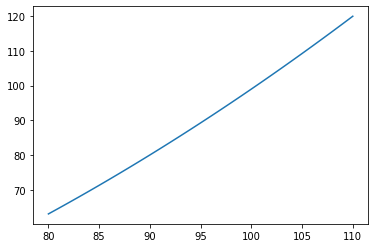

In [6]:
draw(f_1, np.arange(80, 110 + 1))

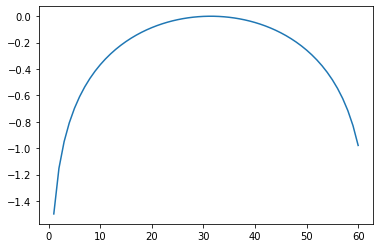

In [7]:
draw(f_2, np.arange(1, 60 + 1))

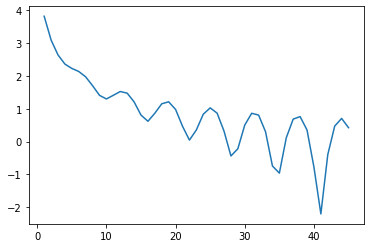

In [8]:
draw(f_3, np.arange(1, 45 + 1))

<div>
    <font size=3>
    Discuss the Convexity of each function according to the diagrams
     </font>
</div>

<font color=darkblue>
    a real-valued function is called convex if the line segment between any two points on the graph of the function does not lie below the graph between the two points. Also a twice-differentiable function of a single variable is convex if and only if its second derivative is nonnegative on its entire domain. In simple terms, a convex function refers to a function that is in the shape of a cup $\cup$.

$f_1(x)$ is convex in the given range because the convexity direction is upward.
    
$f_2(x)$ is concave in the given range because the convexity direction is downward.
    
$f_3(x)$ is non-convex in the given range because the convexity is upward and downward in different sub-ranges.

</font>

<div>
    <font size=3>
what method do you suggest to find the maximum in the second function?
     </font>
</div>

<font color=darkblue>
Assume $g(x)=-f(x)$ and $x^*$ is the minimum of $g(x)$.
    
Now if we find $x^*$ with gradient descent or other methods, it has the same value as maximum of $f(x)$.
</font>

<div>
    <font size=3>
        <hr/>
        <ul>
            In this part, we want to obtain a minimum of one of the above functions with the gradiant descent algorithm
        </ul>  
        <hr/>
    </font>
</div>

## Gradiant descent

<div>
    <font size=3>
    Complete gradiant descent function and calculate the minimum of function (a).
     </font>
</div>

In [9]:
def derivative(func, x):
    epsilon = 5E-10
    return (func(x + epsilon) - func(x)) / epsilon


def gradiant_descent(func, initial_point: float, learning_rate: float, max_iterations: int):
    x = initial_point
    precision = 1E-10

    for _ in range(max_iterations):
        prev_x = x
        x -= learning_rate * derivative(func, x)
        prev_step = np.abs(x - prev_x)
        if prev_step < precision:
            break
    
    return x

In [10]:
gradiant_descent(
    func=f_1, 
    initial_point=np.random.uniform(80, 110),
    learning_rate=0.05, 
    max_iterations=1000
)

31.305036932242658

<div>
    <font size=3>
In the last part, we want to investigate the effect of the learning rate hyperparameter on the gradiant descent algorithm with a new function     
    </font>
</div>

## Function

$f(x_1, x_2) = 2x_1^2 + 3x_2^2 - 4x_1x_2 - 50x + 6y$

In [11]:
def f(x_1, x_2):    
    return 2 * x_1 ** 2 + 3 * x_2 ** 2 - 4 * x_1 * x_2 - 50 * x_1 + 6 * x_2

<div>
    <font size=3>
Implement gradiant descent function for two-dimensional functions, in such a way that it gives sequence of x_1 and x_2 in the output ()
    </font>
</div>

In [12]:
def gradient(func, x):
    if isinstance(x, int):
        x = np.array([x])

    epsilon = 5E-10
    grads = []

    for idx in range(len(x)):
        x_ = x.astype(dtype=np.float_)
        x_[idx] += epsilon

        grads.append((func(*x_) - func(*x)) / epsilon)

    return np.array(grads)


def gradiant_descent(func, initial_point: Tuple, learning_rate: float, threshold: float, max_iterations: int):
    x_1_sequence = [initial_point[0]]
    x_2_sequence = [initial_point[1]]
    
    # Threshold: if either the value of x1 or x2 is greater than this value, the algorithm ends
    x = np.array(initial_point, dtype=np.float_).copy()
    for _ in range(max_iterations):
        if x[0] > threshold or x[1] > threshold:
            break

        x -= learning_rate * gradient(func, x)
        x_1_sequence.append(x[0])
        x_2_sequence.append(x[1])

    return x_1_sequence, x_2_sequence

In [13]:
def draw_points_sequence(func, x_1_sequence, x_2_sequence):
    X1, X2 = np.meshgrid(np.linspace(-100.0, 100.0, 100), np.linspace(-100.0, 100.0, 100))
    Y = func(X1, X2)
    cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X1, X2, Y, )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.scatter(x_1_sequence, x_2_sequence, s=10, c="y")
    plt.show()

<div>
    <font size=3>
    Run the gradiant descent algorithm for each of the learning rate values and use the above function to draw diagram
    </font>
</div>

In [14]:
initial_point = (-100, 100)
learning_rates = [0.01, 0.05, 0.19, 0.4]
threshold = 100
max_iterations = 1000

draw_gradiant_descent = lambda rate: draw_points_sequence(
    f, *gradiant_descent(
        func=f,
        initial_point=initial_point,
        learning_rate=rate,
        threshold=threshold,
        max_iterations=max_iterations
    )
)

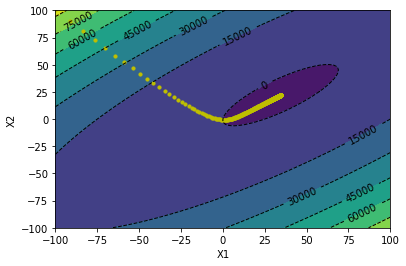

In [15]:
# learning rate 0.01
draw_gradiant_descent(learning_rates[0])

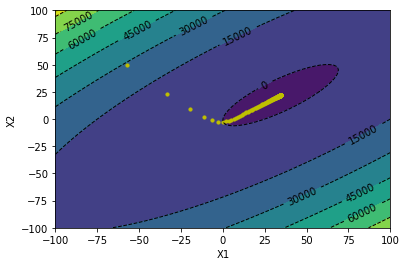

In [16]:
# learning rate 0.05 
draw_gradiant_descent(learning_rates[1])

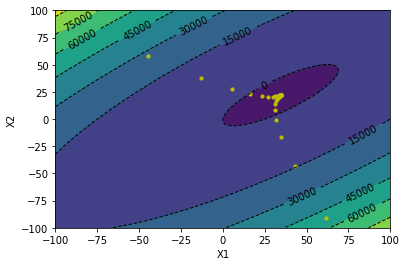

In [17]:
# learning rate 0.19
draw_gradiant_descent(learning_rates[2])

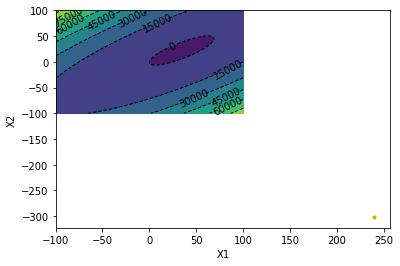

In [18]:
# learning rate 0.4
draw_gradiant_descent(learning_rates[3])

<div>
    <font size=3>
    explain your result comprehensively from the charts, 
    </font>
</div>

<font color=darkblue>
In this part of the question, we can obviously see the impact of learning rate on the convergence of the function in the gradient descent algorithm.
    
With smaller learning rate, the probability of finding the minimum of function (or convergence of the algorithm) is higher but with lower speed.
    
- $0.01$: more iteratios and lower slow than oters, and the algorithm has converged.
- $0.05$: less iterations and more speed than $\alpha=0.01$, and the algorithm has converged.
- $0.19$: less iterations and more speed than $\alpha=0.05, 0.01$, and the algorithm has converged but with different path.
- $0.40$: It doesn't converge $\rightarrow$ bad learning rate

</font>

# Q2. CSPs (30 Points)

<font size=4>
     Author: Alireza Tajmirriahi
     <br/>
     <font color=red>
     Please run all the cells.
     </font>
</font>
<br/>

As students are preparing for midterm exams and the virtual exam days are gone and forgotten, each department is struggling to select at least one hall out of $N$ halls in the university to hold their exams. But here's the thing:
  - Students from each department aren't really fond of sitting next to students from other departments and must be separated (for example CE students and CS students must not share the same hall for exams).
  - Each department likes certain halls and won't hold their exams in other halls.
  - Sadly, the exit doors in some of the halls are stuck and the hard working staff have provided some routes so that the students from specific halls need to walk through the other hall and exit after the examination. And because they would like to prevent cheating as much as possible, students in such halls cannot be from the same department.
Check out the example below to fully understand the situation.

## Example
Look at this picture carefully.<br>
<img src="Images/CSP_example.png" width="400"/>
  - There are $6$ halls and $3$ departments.
  - The halls which the deparments like are indicated (for example, CE exams can be held only at Hall 1, 4 and 6).
  - Students from Hall 1 should exit using the doors in Hall 2 (Note: they all exit there and won't continue to Hall 3). In this case, EE students cannot be in both Hall 1 and 2 (But of course, it's okay for them to be in Hall 1 and 3).

## Note
  - You _must_ implement and use AC-3 algorithm.
  - You will _probably_ need to utilize the heuristic algorithms you have learned (e.g. MRV and LCV) or consider nearly tree-structured graphs approach in order to pass all tests in an appropriate time.

## Input
  - The first line consists of $N$ (count of halls) and $M$ (count of departments).
  - In the following $M$ lines, the $i$ th line ($1 \le i \le M$) is a list of preferred halls for the $i$ th department (separated by space).
  - In the next line, $E$, the total number of exit constraints (edges in the previous graph) are given.
  - in each of the following $E$ lines, a pair of hall numbers (separated by space) is given (reminder: the direction is important).
$$1 \le N \le 50$$
$$1 \le M \le 50$$

### Sample Input
This sample describes the previous example (CE=1, EE=2, ME=3).
```
6 3
1 4 6
1 2 3 5 6
3 4 5
5
1 2
2 3
3 4
3 5
3 6
```

## Output
In the only line, print:
  - list of one appropriate assignment ordered by hall number (separated by space).
  - `NO` if there isn't.

### Sample Output
One possible solution to the example above is {Hall1=CE, Hall2=EE , Hall3=ME, Hall4=CE, Hall5=EE, Hall6=EE}. So:
```
1 2 3 1 2 2
```
In another example, If Hall3 was not an option for ME, then the answer would be:
```
NO
```
Because then hall 2 or 3 would be empty.

## Your code
**Note:** It's OK to change the signature for the given functions and the given structure is just a suggestion to help you with the implementation. (you can't remove or add any cells based on the **Rules** section)

In [19]:
from random import shuffle


class CSP:

    def __init__(self, variables=None, domains=None):
        self._variables = variables or []
        self._domains = domains or {}
        self._constraints = {}
        self._neighbors = {}

        self._update_curr_domain()

    def _update_curr_domain(self):
        self.curr_domains = self._domains.copy()

    @property
    def variables(self):
        return self._variables.copy()
    
    @property
    def neighbors(self):
        return self._neighbors.copy()

    @classmethod
    def _constraint_key(cls, key):
        """valid constraint key"""
        return tuple(sorted(key))
    
    def add_variable(self, var):
        if var not in self._variables:
            self._variables.append(var)
            self._domains[var] = []
            self._neighbors[var] = []

    def add_domain(self, var, domain):
        if var in self._variables:
            self._domains[var].append(domain)
            self._update_curr_domain()

    def add_constraint(self, func, *args):
        n = len(self._constraints)
        self._constraints[self._constraint_key(args)] = func
    
    def add_neighbor(self, var, neighbor):
        if var in self._neighbors.keys():
            self._neighbors[var].append(neighbor)
    
    def constraint_satisfied(self, variables, values):
        func = self._constraints[self._constraint_key(variables)]
        return bool(func(*values))

    def impose(self, var, value):
        removals = [(var, a) for a in self.curr_domains[var] if a != value]
        self.curr_domains[var] = [value]
        return removals

    def prune(self, var, value, removals):
        self.curr_domains[var].remove(value)
        if removals is not None:
            removals.append((var, value))

    def restore(self, removals):
        for var, val in removals:
            self.curr_domains[var].append(val)

    def legal_values_count(self, i):
        return len(self.curr_domains[i])

    def conflicts_count(self, var, value, assignment):
        return sum(bool(
            neighbor in assignment
            and not self.constraint_satisfied((var, neighbor), (value, assignment[neighbor]))
        ) for neighbor in self._neighbors[var])

    def mrv(self, assignment):
        unassigned = [v for v in self._variables if v not in assignment]
        shuffle(unassigned)         
        return min(unassigned, key=lambda var: self.legal_values_count(var))

    def lcv(self, var, assignment):
        return sorted(
            self.curr_domains[var],
            key=lambda val: self.conflicts_count(var, val, assignment)
        )

    def revise(self, i, j, removals):
        revised = False
        for x in self.curr_domains[i]:

            if not any(self.constraint_satisfied((i, j), (x, y)) for y in self.curr_domains[j]):
                self.prune(var=i, value=x, removals=removals)
                revised = True

        return revised

    def ac_3(self, queue=None, removals=None):
        if not queue:
            queue = [(i, j) for i in self._variables for j in self._neighbors[i]]

        while queue:
            i, j = queue.pop()
            if self.revise(i, j, removals):
                if len(self.curr_domains[i]) == 0:
                    return False

                for k in self._neighbors[i]:
                    queue.append((k, i)) if i != k else None
        return True
    

def get_problem(hall_count, department_count, domains, exists_count, exists):
    csp = CSP()
    for var in range(hall_count):
        csp.add_variable(var + 1)
    
    for i in range(department_count):
        for var in domains[i]:
            csp.add_domain(var, i + 1)

    for arc in range(exists_count):
        x, y = exists[arc]
        csp.add_constraint(lambda var1, var2: var1 != var2, x, y)
        csp.add_neighbor(x, y)

    return csp

In [20]:
def select_unassigned_variable(csp: CSP, assignment):
    return csp.mrv(assignment)


def order_domain_values(csp: CSP, var, assignment):
    return csp.lcv(var, assignment)


def inference(csp: CSP, var, removals):
    return csp.ac_3([(x, var) for x in csp.neighbors[var]], removals)

In [21]:
def backtrack(csp: CSP, assignment):
    if len(assignment) == len(csp.variables):
        return assignment

    var = select_unassigned_variable(csp, assignment)
    for value in order_domain_values(csp, var, assignment):
        if csp.conflicts_count(var, value, assignment) == 0:
            assignment[var] = value
            removals = csp.impose(var, value)
            if inference(csp, var, removals):
                result = backtrack(csp, assignment)
                if result:
                    return result
            csp.restore(removals)
            assignment.pop(var)
    return None


def backtracking_search(csp: CSP):
    result = backtrack(csp, {})
    if result:
        return ' '.join(map(lambda x: str(x[1][0]), sorted(csp.curr_domains.items())))
    return 'NO'


In [22]:
import Helper_codes.question2 as q2
import time

TIME_LIMIT = 3

tests = q2.get_all_tests(prefix='q2_')
tests_passed = 0
for test in tests:
    n, m, m_next_lines, e, next_e_lines = q2.scan_test_input(test)
    csp = get_problem(n, m, m_next_lines, e, next_e_lines)
    start_time = time.time()
    result = backtracking_search(csp)
    total_time = time.time() - start_time
    if q2.is_result_valid(test, result) and total_time < TIME_LIMIT:
        tests_passed += 1
    else:
        print(f'test {test} failed. time elapsed= {total_time}')
print(f'Score = {tests_passed / len(tests) * 100}%')

Score = 100.0%


# Q3 (30+5 Points)

<font size=4>
Author: Matina mehdizadeh
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In [ ]:
# place for your custom functions for Q3 here

Consider the given 8*8 board game. There are two players in this game and they try to block each other and limit their valid moves by making walls. Their moves are limited to the 8 cells (or less when they are around the edges) beside them and the walls will start to appear only when a player steps into a random generated yellow cell and the wall will continue to be built until the player reaches the next yellow cell. The players start the game at (0,0) and (7,7) and they keep playing untill one of them loses. There are multiple ways for a player to win the match:
- If a player steps into a wall or out of the board, the player loses the match and "invalid move" massege will appear on terminal.
- If the players reach the maximum moves the game finishes and the winner would be chosen based on the maximum valid move they have left plus the number of walls they have made and "No more moves" massege will appear on terminal.
- If the getMove() function does not return any value after 2 seconds, the player loses the match and "Time limit exceeded" massege will appear on terminal.
<img src="Images/Q3.png" style="float: center; margin-left: 250px; margin-top: 50px; width:500px;height:400px;"/>

In this question, the codes for starting the game were provided for you in Helper-codes folder. You are expected to implement the MinimaxPlayer class (which inherit the Player class) with alpha-beta pruning. (25 points)

## Libraries

In [2]:
!pip install tk
!pip install matplotlib
import numpy as np
import random
from Helper_codes.graphics import *
from Helper_codes.question3 import *
import time
import matplotlib.pyplot as plt

**The following implementations are suggestional and you may change them if you desire.
The move_ functions' purpose is to find out if a player, has a valid move on that direction.
the purpose of checkRow and CheckCole are to check if the player's x and y is still in the board.**


In [22]:
import math
from enum import Enum
from random import shuffle


class Action(Enum):
    UP = (0, 1)
    DOWN = (0, -1)
    LEFT = (-1, 0)
    RIGHT = (1, 0)
    UR = (1, 1)
    UL = (-1, 1)
    DR = (1, -1)
    DL = (-1, -1)

    
class MinimaxPlayer(Player):

    _actions = [
        Action.UP, Action.DOWN, Action.LEFT, Action.RIGHT,
        Action.UR, Action.UL, Action.DR, Action.DL
    ]

    def __init__(self, col, x, y, max_depth=None):
        super().__init__(col, x, y)
        self.max_depth = max_depth if max_depth else 3

    def result(self, board, action):
        x, y = self.new_location(*action.value)
        board.move(IntPair(x, y), self.getCol())
        return board

    def new_location(self, dx, dy):
        return self.getX() + dx, self.getY() + dy

    def available(self, board, x, y):
        if x < 0 or y < 0 or x >= board.getSize() or y >= board.getSize():
            return False
        return bool(board.getCell(x, y).getColor() not in [self.competitor(), self.getCol()])

    def valid_actions(self, board):
        return list(filter(
            lambda action:
            self.available(board, *self.new_location(*action.value)),
            self._actions))

    def competitor(self):
        return 3 - self.getCol()

    def utility(self, board):
        return board.getScore(self.getCol()) - board.getScore(self.competitor())

    def max_value(self, board: Board, alpha, beta, depth):
        if depth > self.max_depth:
            return self.utility(board)
        v = -math.inf
        for action in self.valid_actions(board):
            v = max(v, self.min_value(self.result(board, action), alpha, beta, depth + 1))
            if v >= beta:
                return v
            alpha = max(alpha, v)
        return v

    def min_value(self, board, alpha, beta, depth):
        if depth > self.max_depth:
            return self.utility(board)
        v = math.inf
        for action in self.valid_actions(board):
            v = min(v, self.max_value(self.result(board, action), alpha, beta, depth + 1))
            if v <= alpha:
                return v
            beta = min(beta, v)
        return v

    def canMove(self, x, y, board):
        """can move in here should  return true when board color
        is the same as player color because of an implementation in helper code"""
        if x < 0 or y < 0 or x >= board.getSize() or y >= board.getSize():
            return False
        return bool(board.getCell(x, y).getColor() not in [self.competitor()])

    def getMove(self, board):
        alpha = -math.inf
        beta = math.inf
        depth = 0
        best_action, best_score = None, -math.inf

        if board.getNumberOfMoves() == board.maxNumberOfMoves:
            return IntPair(-20, -20)

        if not self.canMove(board.getPlayerX(self.getCol()), board.getPlayerY(self.getCol()), board):
            return IntPair(-10, -10)

        actions = self.valid_actions(board)
        shuffle(actions)
        for action in actions:
            v = self.max_value(board, alpha, beta, depth) if self.getCol() == 1 \
                else self.min_value(board, alpha, beta, depth)
            if (self.getCol() == 1 and v > best_score) or (self.getCol() != 1 and v < - best_score):
                best_action = action
                best_score = v

        if best_action is None:
            return IntPair(-10, -10)

        return IntPair(*self.new_location(*best_action.value))


def plot_result(scores):
    plt.plot(scores)
    plt.xlabel('game number')
    plt.ylabel('scores')
    plt.legend(['player 1', 'player 2'])
    plt.show()


def run_game(players_cls, match_num=10, max_iter=10):
    scores = []
    for _ in range(max_iter):
        p1 = players_cls[0](1, 0, 0)
        p2 = players_cls[1](2, 7, 7)
        game = Game(p1, p2)
        score = game.start(match_num)
        scores.append(score)
    return scores

If you run the game once (numberOfMatches = 1) the game window will open and you would be able to observe the players behaviour and the reason why the winner has won, will appear on terminal.
If you run the game for more than one match (numberOfMatches > 1) the graphic window and the comments on terminal would not show up. This is for the time you finish implementing the MinimaxPlayer class and you want to verify the functionality of your code; also, for next part of the question, in which you should plot the scores for the first player.

In [27]:
################################################################
# p1 must be replace with minimaxPlayer                        #
################################################################

p1 = MinimaxPlayer(1, 0, 0)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 1
score1, score2 = g.start(numberOfMatches)
print(score1 / numberOfMatches)

Player 2 has made an invalid move
Player 1 has won

1.0


In this section, you need to run the game code multiple times and each time with the same numberOfMatches (this should be a large number so your answer be more reliable) once for Naive player and once for Minimax. compare these two plots in terms of shape and the main elements of the distribution. (5 points)

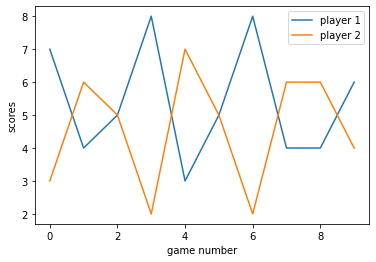

[(7, 3), (4, 6), (5, 5), (8, 2), (3, 7), (5, 5), (8, 2), (4, 6), (4, 6), (6, 4)]


In [5]:
################################################################
# when player1 is NaivePlayer (2.5 point)                      #
################################################################

match_num = 10
scores = run_game((NaivePlayer, NaivePlayer), match_num)
plot_result(scores)
print(scores)

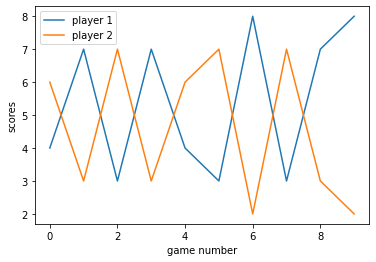

[(4, 6), (7, 3), (3, 7), (7, 3), (4, 6), (3, 7), (8, 2), (3, 7), (7, 3), (8, 2)]


In [28]:
################################################################
# when player1 is MinimaxPlayer (2.5 point)                    #
################################################################

scores = run_game((MinimaxPlayer, NaivePlayer), match_num)
plot_result(scores)
print(scores)

In this section you should change the game settings for different depths and plot the number of wins in fix number of matches for these depths. Also, you should let two minimax players with diffrent depths play againts eachother and report your observation.(5 points)

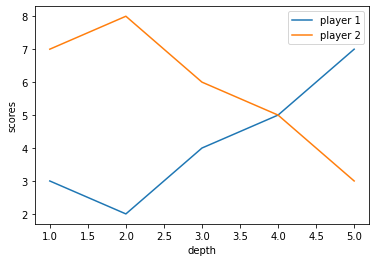

[(3, 7), (2, 8), (4, 6), (5, 5), (7, 3)]


In [18]:
################################################################
# plot the number of wins for diffrent depths (2.5 point)      #
################################################################

def run(depth, match_num=10): 
    p1 = MinimaxPlayer(1, 0, 0, depth)
    p2 = NaivePlayer(2, 7, 7)
    game = Game(p1, p2)
    return game.start(match_num)


def plot(scores, depths):
    plt.plot(depths, scores)
    plt.xlabel('depth')
    plt.ylabel('scores')
    plt.legend(['player 1', 'player 2'])
    plt.show()


depths = [1, 2, 3, 4, 5]
scores = [run(depth) for depth in depths]
plot(scores, depths)
print(scores)

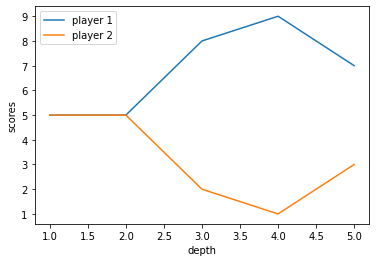

[(5, 5), (5, 5), (8, 2), (9, 1), (7, 3)]


In [23]:
################################################################
# start the match for two minimax players (2.5 point)          #
################################################################
def run(depth, match_num=10): 
    p1 = MinimaxPlayer(1, 0, 0, depth)
    p2 = MinimaxPlayer(2, 7, 7, depth)
    game = Game(p1, p2)
    return game.start(match_num)


def plot(scores, depths):
    plt.plot(depths, scores)
    plt.xlabel('depth')
    plt.ylabel('scores')
    plt.legend(['player 1', 'player 2'])
    plt.show()


depths = [1, 2, 3, 4, 5]
scores = [run(depth) for depth in depths]
plot(scores, depths)
print(scores)